## Decision Tree and Random Forest of LendingClub

**This is using the real publicly available data from LendingClub.com.

This company connects borrowers with peopl who have money. We need to create a model to see which borrowers have high probability of paying the investors back. 

In 2016, Lending Club experienced some scandals https://en.wikipedia.org/wiki/Lending_Club#2016. This data is from before they went public. So keep the context in mind. 

The data I will be using is from 2007 to 2010 and be classify whether or not the borrower will pay back their loan in full. The data used in this set has been cleaned of NA values. The original data is available here https://www.lendingclub.com/info/download-data.action.

#### Some info of the column names

credit.policy: 1 if the customer meets the credit underwriting criteria of LendingClub.com, and 0 otherwise.

purpose: The purpose of the loan (takes values "credit_card", "debt_consolidation", "educational", "major_purchase", "small_business", and "all_other").

int.rate: The interest rate of the loan, as a proportion (a rate of 11% would be stored as 0.11). Borrowers judged by LendingClub.com to be more risky are assigned higher interest rates.

installment: The monthly installments owed by the borrower if the loan is funded.

log.annual.inc: The natural log of the self-reported annual income of the borrower.

dti: The debt-to-income ratio of the borrower (amount of debt divided by annual income).

fico: The FICO credit score of the borrower.

days.with.cr.line: The number of days the borrower has had a credit line.
revol.bal: The borrower's revolving balance (amount unpaid at the end of the credit card billing cycle).

revol.util: The borrower's revolving line utilization rate (the amount of the credit line used relative to total credit available).

inq.last.6mths: The borrower's number of inquiries by creditors in the last 6 months.

delinq.2yrs: The number of times the borrower had been 30+ days past due on a payment in the past 2 years.

pub.rec: The borrower's number of derogatory public records (bankruptcy filings, tax liens, or judgments).

In [163]:
#Import libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_palette("GnBu_d")
sns.set_style("whitegrid")
%matplotlib inline

In [164]:
#Read the data
loans = pd.read_csv('loan_data.csv')

In [165]:
#Info about the data
loans.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


In [166]:
loans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
credit.policy        9578 non-null int64
purpose              9578 non-null object
int.rate             9578 non-null float64
installment          9578 non-null float64
log.annual.inc       9578 non-null float64
dti                  9578 non-null float64
fico                 9578 non-null int64
days.with.cr.line    9578 non-null float64
revol.bal            9578 non-null int64
revol.util           9578 non-null float64
inq.last.6mths       9578 non-null int64
delinq.2yrs          9578 non-null int64
pub.rec              9578 non-null int64
not.fully.paid       9578 non-null int64
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


In [167]:
#There is one object (purpose) in the dataset, it is categorical.
#Which mean I need to change it into dummy variable.

In [168]:
loans.describe()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
count,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9.578000e+03,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000
mean,0.804970,0.122640,319.089413,10.932117,12.606679,710.846314,4560.767197,1.691396e+04,46.799236,1.577469,0.163708,0.062122,0.160054
std,0.396245,0.026847,207.071301,0.614813,6.883970,37.970537,2496.930377,3.375619e+04,29.014417,2.200245,0.546215,0.262126,0.366676
min,0.000000,0.060000,15.670000,7.547502,0.000000,612.000000,178.958333,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.103900,163.770000,10.558414,7.212500,682.000000,2820.000000,3.187000e+03,22.600000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.122100,268.950000,10.928884,12.665000,707.000000,4139.958333,8.596000e+03,46.300000,1.000000,0.000000,0.000000,0.000000
75%,1.000000,0.140700,432.762500,11.291293,17.950000,737.000000,5730.000000,1.824950e+04,70.900000,2.000000,0.000000,0.000000,0.000000
max,1.000000,0.216400,940.140000,14.528354,29.960000,827.000000,17639.958330,1.207359e+06,119.000000,33.000000,13.000000,5.000000,1.000000


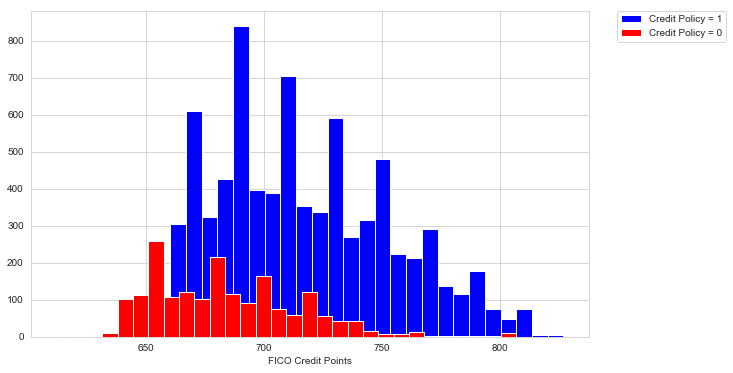

In [169]:
#Explore the data
#Start with histplot of two FICO credit scores on top of each other.
#One for each credit policy outcome.
plt.figure(figsize=(10,6))
loans[loans['credit.policy']==1]['fico'].hist(bins=30, color='blue',
                                              label='Credit Policy = 1')
loans[loans['credit.policy']==0]['fico'].hist(bins=30, color='red',
                                              label='Credit Policy = 0')
plt.legend()
plt.xlabel('FICO Credit Points')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0)

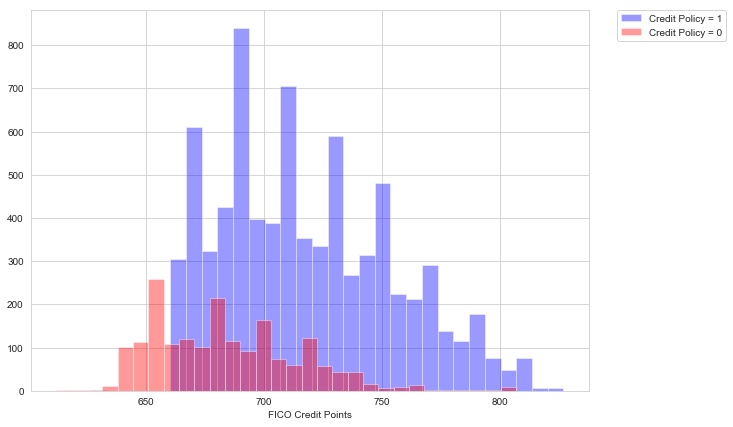

In [170]:
#Or using seaborn
plt.figure(figsize=(10,7))

sns.distplot(loans[loans['credit.policy']==1]['fico'], bins=30, kde=False,
             color='blue', label='Credit Policy = 1')
sns.distplot(loans[loans['credit.policy']==0]['fico'], bins=30, kde=False,
             color='red', label='Credit Policy = 0')

plt.xlabel('FICO Credit Points')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0)

In [171]:
#People with lower FIFO credit points has credit policy of 0.
#1 is when the customer meets the credit criteria of lendingclub.com
#We can also see the cutoff point at about 660 will automatically
#not meet the credit underwriting criteria of the company.

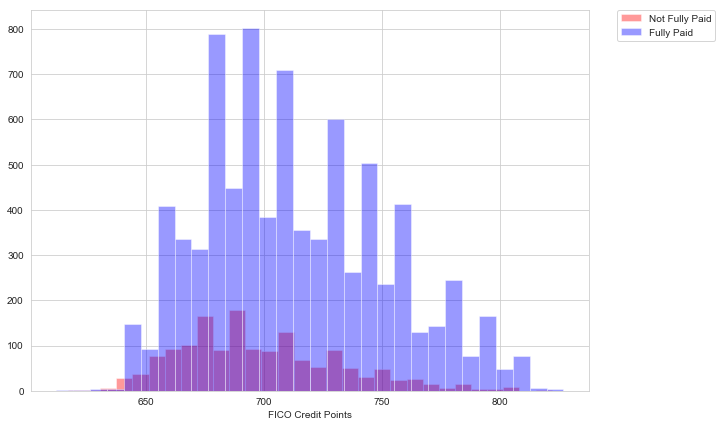

In [172]:
#Create histplot of two FICO credit scores on top of each other but using
#not.fully.paid

plt.figure(figsize=(10,7))

sns.distplot(loans[loans['not.fully.paid']==1]['fico'], bins=30, kde=False,
             color='red', label='Not Fully Paid')
sns.distplot(loans[loans['not.fully.paid']==0]['fico'], bins=30, kde=False,
             color='blue', label='Fully Paid')

plt.xlabel('FICO Credit Points')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0)

In [173]:
#Majority of the people fully paid the credit. The spikes mean that certain
#FICO scores have higher distribution

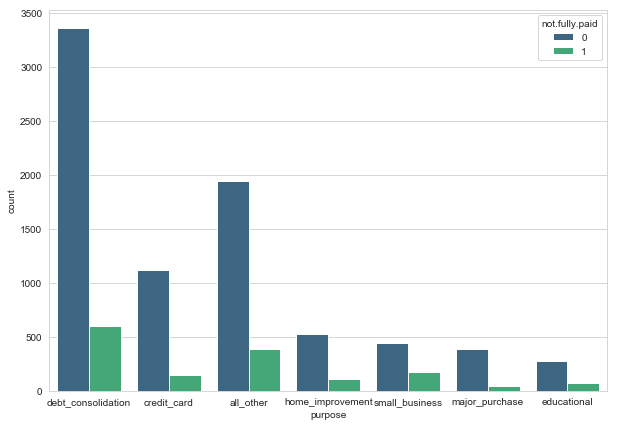

In [174]:
#Create a countplot showing loan purposes with hue of not.fully.paid
plt.figure(figsize=(10,7))
sns.countplot(x='purpose', hue='not.fully.paid', data=loans, palette='viridis')

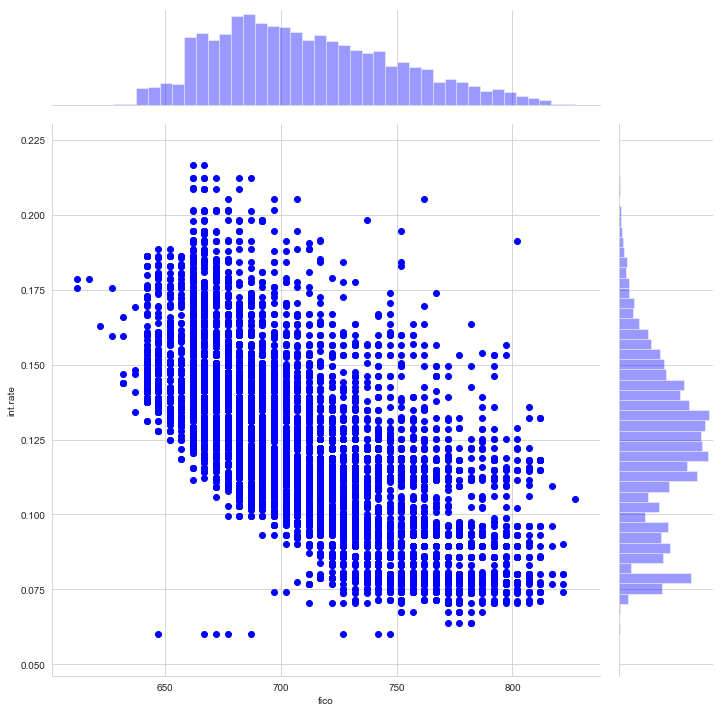

In [175]:
#See the trend between FICO and interest rate using jointplot
sns.jointplot(x='fico', y='int.rate', data=loans, color='blue', height=10)

In [176]:
#High FICO score means that the credit is high. 
#Therefore, from this plot, as FICO score increases, the interest rate
#decreases and vice versa.

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\regression.py:546: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


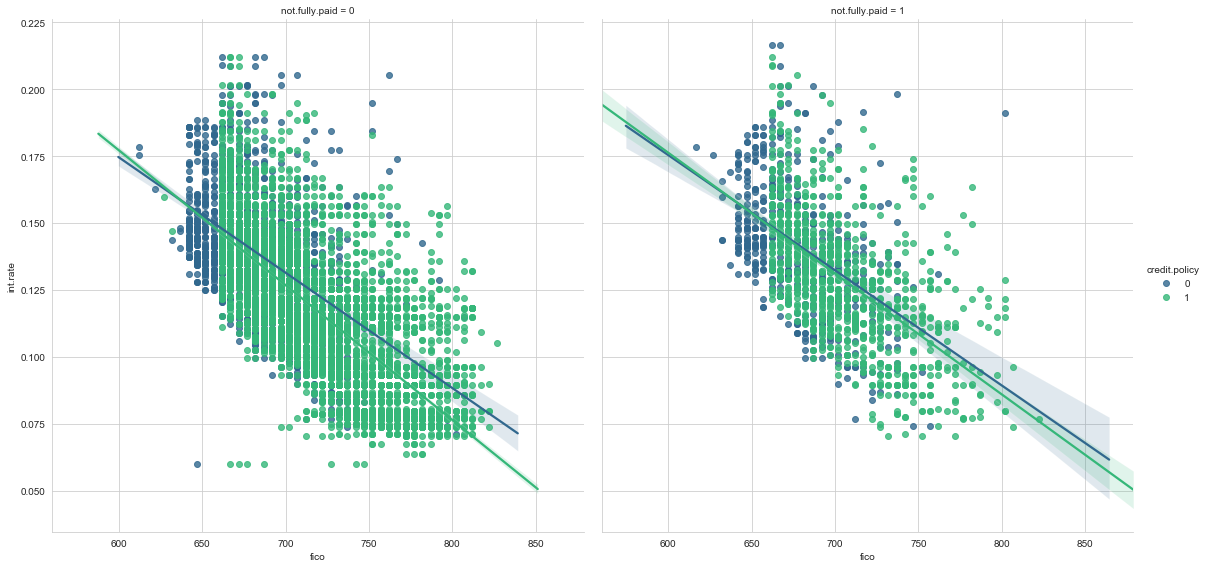

In [177]:
#Create implots of fico and interest rate to see if the trend differed between
#not fully paid and credit policy.
sns.lmplot(x='fico', y='int.rate', data=loans,
           col='not.fully.paid', hue='credit.policy', 
           palette='viridis', size=8)

In [178]:
#The behavior is relatively the same whether it was fully paid or not
#and whether or not they were denied the credit policy.

In [179]:
#Setting up the data for Random Forest
#like mentioned above, there is categorical data here and it is required to 
#convert to dummy variables.
loans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
credit.policy        9578 non-null int64
purpose              9578 non-null object
int.rate             9578 non-null float64
installment          9578 non-null float64
log.annual.inc       9578 non-null float64
dti                  9578 non-null float64
fico                 9578 non-null int64
days.with.cr.line    9578 non-null float64
revol.bal            9578 non-null int64
revol.util           9578 non-null float64
inq.last.6mths       9578 non-null int64
delinq.2yrs          9578 non-null int64
pub.rec              9578 non-null int64
not.fully.paid       9578 non-null int64
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


In [180]:
#Create a list and call it cat_feats
cat_feats = ['purpose']

In [181]:
#convert it to dummies and call it as final_data
#pd.get_dummies(loans,columns=cat_feats,drop_first=True) 
#to create a fixed larger dataframe that has new feature columns 
#with dummy variables

final_data = pd.get_dummies(loans, columns=cat_feats, drop_first=True)

In [182]:
#Let's see
final_data.head()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_major_purchase,purpose_small_business
0,1,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0,0,1,0,0,0,0
1,1,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0,1,0,0,0,0,0
2,1,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0,0,1,0,0,0,0
3,1,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0,0,1,0,0,0,0
4,1,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0,1,0,0,0,0,0


In [183]:
final_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 19 columns):
credit.policy                 9578 non-null int64
int.rate                      9578 non-null float64
installment                   9578 non-null float64
log.annual.inc                9578 non-null float64
dti                           9578 non-null float64
fico                          9578 non-null int64
days.with.cr.line             9578 non-null float64
revol.bal                     9578 non-null int64
revol.util                    9578 non-null float64
inq.last.6mths                9578 non-null int64
delinq.2yrs                   9578 non-null int64
pub.rec                       9578 non-null int64
not.fully.paid                9578 non-null int64
purpose_credit_card           9578 non-null uint8
purpose_debt_consolidation    9578 non-null uint8
purpose_educational           9578 non-null uint8
purpose_home_improvement      9578 non-null uint8
purpose_major_purchase        9

In [184]:
#Split train test data
from sklearn.model_selection import train_test_split

In [185]:
X = final_data.drop('not.fully.paid', axis=1)
y = final_data['not.fully.paid']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [186]:
#Create decision tree model
from sklearn.tree import DecisionTreeClassifier

In [187]:
dtree = DecisionTreeClassifier()

In [188]:
dtree.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [189]:
#Prediction using decision tree
predictions = dtree.predict(X_test)

In [190]:
#Evaluation
from sklearn.metrics import classification_report, confusion_matrix

In [191]:
print(confusion_matrix(y_test, predictions))
print('\n')
print(classification_report(y_test, predictions))

[[1982  449]
 [ 343  100]]


              precision    recall  f1-score   support

           0       0.85      0.82      0.83      2431
           1       0.18      0.23      0.20       443

   micro avg       0.72      0.72      0.72      2874
   macro avg       0.52      0.52      0.52      2874
weighted avg       0.75      0.72      0.74      2874



In [192]:
#Tree visualization
from IPython.display import Image  
from sklearn.externals.six import StringIO  
from sklearn.tree import export_graphviz
import pydot 

In [193]:
features = list(final_data.drop('not.fully.paid', axis=1).columns)
features

['credit.policy',
 'int.rate',
 'installment',
 'log.annual.inc',
 'dti',
 'fico',
 'days.with.cr.line',
 'revol.bal',
 'revol.util',
 'inq.last.6mths',
 'delinq.2yrs',
 'pub.rec',
 'purpose_credit_card',
 'purpose_debt_consolidation',
 'purpose_educational',
 'purpose_home_improvement',
 'purpose_major_purchase',
 'purpose_small_business']

In [194]:
#dot_data = StringIO()  
#export_graphviz(dtree, out_file=dot_data,feature_names=features,filled=True,rounded=True)

#graph = pydot.graph_from_dot_data(dot_data.getvalue())  
#Image(graph[0].create_png())

#This is pretty much useless. 

In [195]:
#Train using random forest
from sklearn.ensemble import RandomForestClassifier

In [196]:
rfc = RandomForestClassifier(n_estimators=600)
#n_estimators will be saturated at one point 
#meaning that increasing it won't give you any benifit.

In [197]:
rfc.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=600, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [198]:
#prediction
rfc_pred = rfc.predict(X_test)

In [199]:
#evaluation
print(confusion_matrix(y_test, rfc_pred))
print('\n')
print(classification_report(y_test, rfc_pred))

[[2421   10]
 [ 432   11]]


              precision    recall  f1-score   support

           0       0.85      1.00      0.92      2431
           1       0.52      0.02      0.05       443

   micro avg       0.85      0.85      0.85      2874
   macro avg       0.69      0.51      0.48      2874
weighted avg       0.80      0.85      0.78      2874



In [200]:
#Based on the results, a better model is depending on which metric is more
#important, for precision, randomForest is better but the recall for 1 is 
#not as high as decision tree. 
#randomforest has high precision but it is not better in a few spots.
#it depends on what the costs associated with each of these calls.
#This will require business domain experience.
#A Venn diagram with three circles: what the business needs, 
#what the users wants etc. to understand what the best model is.
#As regards precision, 
#more feature engineering is required to create a better model.